## ***Problem Definition***

*The oil market's high volatility poses challenges for investors, policymakers, and energy companies. To effectively manage risk and strategize in response to rapid price shifts, these stakeholders require insights into the factors behind oil price changes. Birhan Energies, a consultancy specializing in energy market intelligence, aims to provide this actionable intelligence. Understanding how specific events impact Brent oil prices will help clients make informed investment decisions, develop resilient policies, and optimize operational strategies.*

*This section of the Project deals with Exploratory Data Analysis of Time Series Data.*

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sys
sys.path.append('../scripts')
from data_analysis import DataAnalysis

### ***1.Data Collection***

In [2]:
#Load Data
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### ***2. Data Preprocessing***

In [3]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [4]:
#Statistical Description
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [5]:
#Change the date datatype
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

C:\Users\Wasihun\AppData\Local\Temp\ipykernel_17444\2985078730.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [6]:
#Check for the sample date
df['Date'].head()

0   1987-05-20
1   1987-05-21
2   1987-05-22
3   1987-05-25
4   1987-05-26
Name: Date, dtype: datetime64[ns]

In [7]:
#Check for missing Values
df.isnull().sum()

Date     0
Price    0
dtype: int64

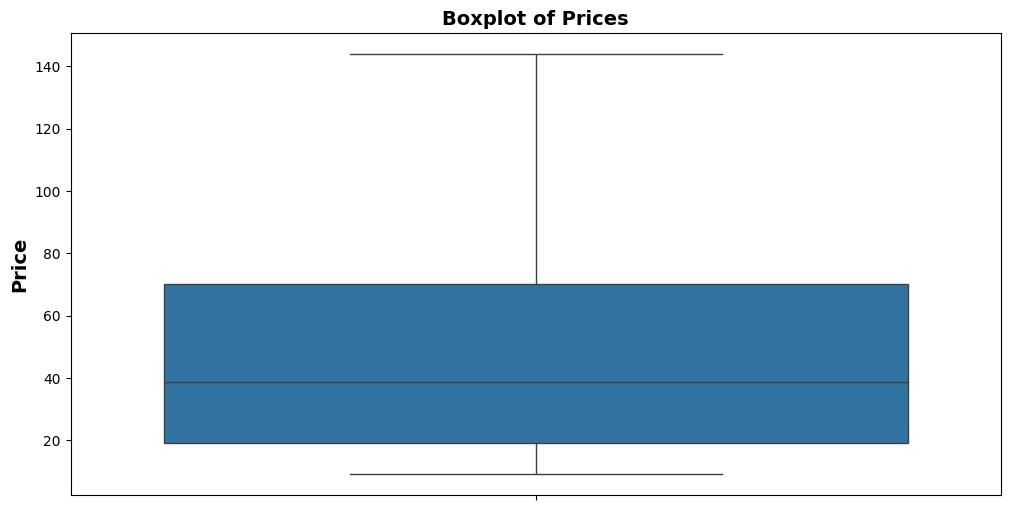

In [8]:
# Use Boxplots to detect outliers
# Initialize the class
da = DataAnalysis(df)
da.outliers()

### ***3. Exploratory Data Analysis***

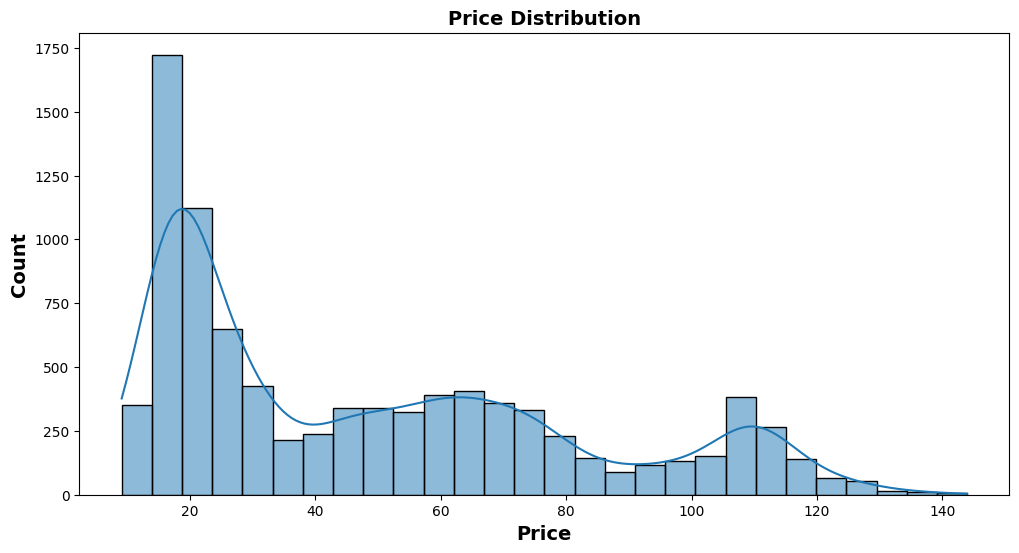

In [9]:
#Check for distribution of 'Price'
da.distribution()

In [10]:
#Set 'Date' as the Index
df.set_index('Date', inplace=True)

In [11]:
#Since the is needed to be in chronological order let's resample it by business day.
df = df.asfreq('b', method='ffill')

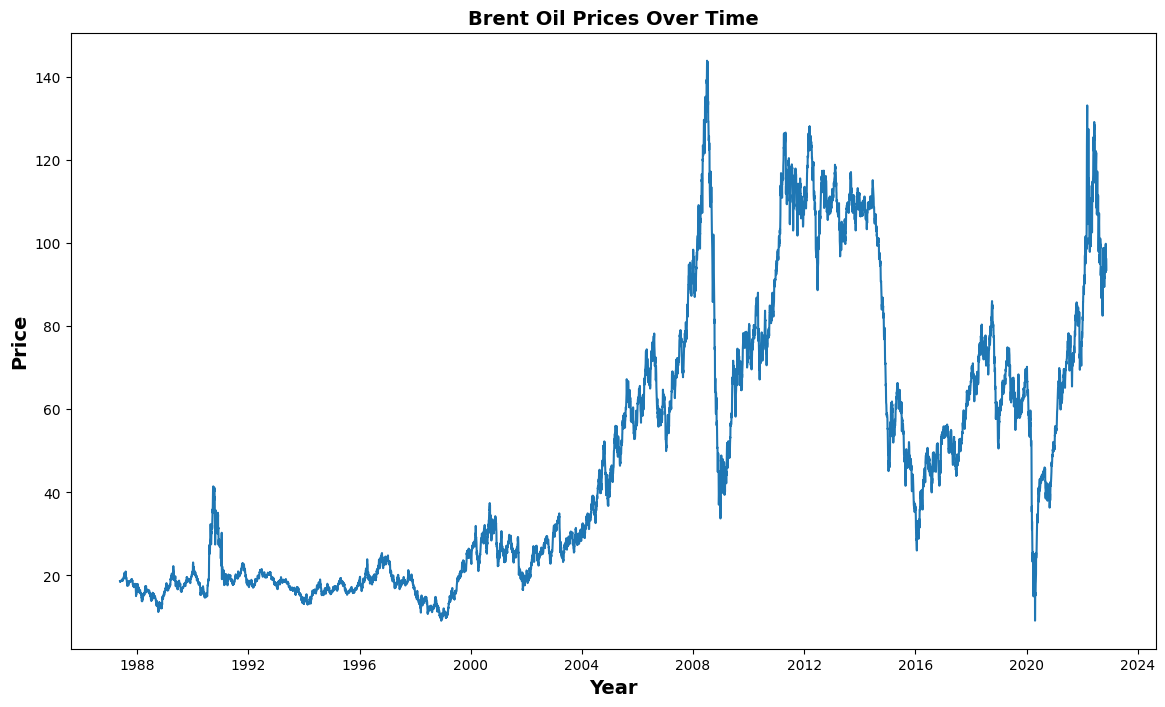

In [12]:
#Plot the 'Price' against the 'Date'
da.price_overtime()

#### ***Stationarity Dicky Fuller Test***

In [13]:
#Check for Stationarity
result = adfuller(df['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print(f'Data is stationary')
else:
    print(f'Data is non-stationary')

ADF Statistic: -2.0239950997432996
p-value: 0.27615218510488515
Data is non-stationary


#### ***Seasonality Decomposition***

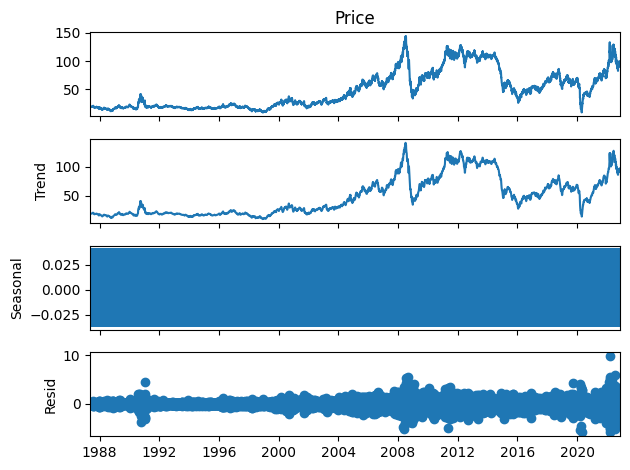

In [14]:
#Check for Seasonality
result = seasonal_decompose(df['Price'], model='additive')
result.plot()
plt.show()

#### ***OBSERVATION***

- *The price exhibits a long-term upward trend with significant fluctuations.*
- *The trend captures the long-term movement in the data, showing a steady increase with periods of rapid growth and decline. The 2008 global financial crisis is visible as a sharp peak, followed by a decline.*
- *The seasonal component is almost constant, which suggests very little or no seasonality in the data.*
- *Residuals show periods of increased volatility, suggesting external shocks influence price movements.*

#### ***Auto Correlation and Partial Auto Correlation***

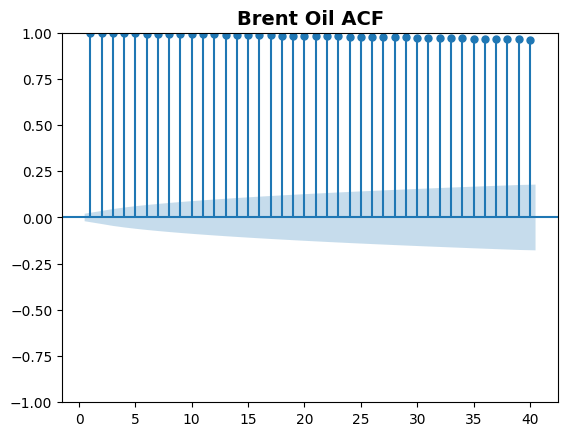

In [15]:
#ACF
plot_acf(df['Price'], lags=40, zero=False)
plt.title('Brent Oil ACF', fontsize=14, fontweight="bold")
plt.show()

#### ***OBSERVATION***

- *The autocorrelation values are close to 1 across almost all lags, signaling a very strong positive correlation throughout the series. This strong relationship between past and present values suggests non-stationarity, as is typical of time series data with persistent trends.*

- *The autocorrelation does not decrease over time, which is another sign of non-stationarity. In stationary data, we would typically expect the autocorrelations to diminish or approach zero as lag increases.*

- *The blue-shaded area represents the confidence interval (often around 95%), where values within this range are considered statistically insignificant. However, nearly all lags lie outside this confidence interval, underscoring the high level of autocorrelation throughout the series.*

- *This autocorrelation plot suggests that the time series is likely non-stationary, meaning it exhibits persistent trends or patterns that do not stabilize over time.*

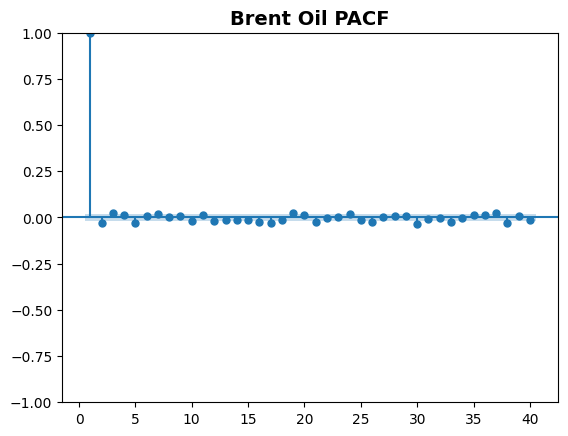

In [16]:
#PACF
plot_pacf(df['Price'], lags=40, zero=False)
plt.title('Brent Oil PACF', fontsize=14, fontweight="bold")
plt.show()

#### ***OBSERVATION***

- *The first lag shows a strong positive partial autocorrelation close to 1, indicating that the current value is highly correlated with the previous value. This suggests a potential AR(1) component in an ARIMA model.*

- *Beyond lag 1, the partial autocorrelation quickly drops to near zero, with no significant spikes. This suggests little to no additional influence from values further back in time.*

In [17]:
#Export the data
df.to_csv('../data/oil.csv')